In [1]:
import matplotlib.pyplot as plt
from birdseye.results import * 


['2021-04-21T13:32:31', '2021-04-21T13:32:14', '2021-04-23T08:33:27', '2021-04-23T08:30:30', '2021-04-23T08:39:00', '2021-04-22T22:32:43', '2021-04-30T00:46:53', '2021-04-30T08:59:25']


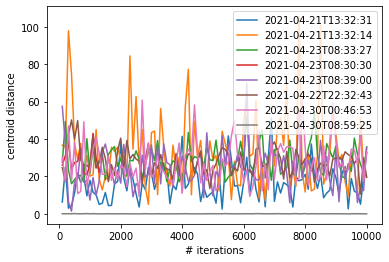

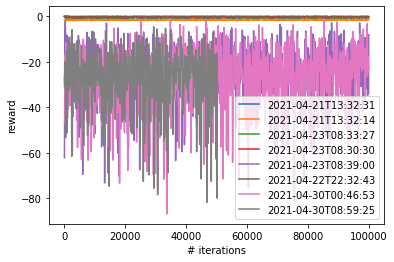

In [18]:
dqn_runs = get_valid_runs('dqn')
config_filter = {'target_speed':'0.0'}
filtered_dqn_runs = filter_runs('dqn', dqn_runs, config_filter)
print(filtered_dqn_runs)

plt.figure()
for r in filtered_dqn_runs: 
    config = get_config('dqn', r)
    data = get_data('dqn', r)
    plt.plot(data['n_iter'][:100], data['avg_centroid_err'][:100]/float(config['Methods']['max_episode_length']), label=r)
plt.xlabel('# iterations')
plt.ylabel('centroid distance')
plt.legend()
plt.show()

plt.figure()
for r in filtered_dqn_runs: 
    config = get_config('dqn', r)
    data = get_data('dqn', r)
    plt.plot(data['n_iter'], data['total_reward']/float(config['Methods']['max_episode_length']), label=r)
plt.xlabel('# iterations')
plt.ylabel('reward')
plt.legend()
plt.show()
#total_reward

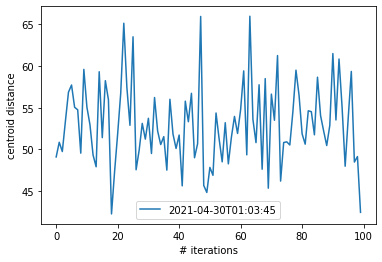

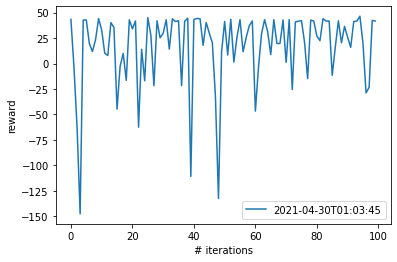

In [11]:

mcts_runs = get_valid_runs('mcts')
config_filter = {'target_speed':'0.0'}
filtered_mcts_runs = filter_runs('mcts', mcts_runs, config_filter)

plt.figure()
for r in filtered_mcts_runs: 
    config = get_config('mcts', r)
    data = get_data('mcts', r)
    plt.plot( data['avg_centroid_err'], label=r)
plt.xlabel('# iterations')
plt.ylabel('centroid distance')
plt.legend()
plt.show()

plt.figure()
for r in filtered_mcts_runs: 
    config = get_config('mcts', r)
    data = get_data('mcts', r)
    plt.plot(data['total_reward'], label=r)
plt.xlabel('# iterations')
plt.ylabel('reward')
plt.legend()
plt.show()